In [1]:
import gensim
import nltk
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from os import listdir
from os.path import isfile, join
#nltk.download()
import string 
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import pickle 
import pandas as pd 
import os

from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt

In [2]:
#case metadata
casedata = pd.read_pickle('casedata.pkl')


print(len(casedata))

casedata.head(10)

10381


,Year,Date,Month,filename,Day,Category,Sub-Category
CaseId,,,,,,,
X1HND4A003,2012,5/11/12,5,X1HND4A003_contentMajOp_SMITH.txt,11,7.0,Contracts
X1IRIC8003,2012,11/5/12,11,X1IRIC8003_contentMajOp_IKUTA.txt,5,7.0,Damages & Remedies
X1EO338N,2012,12/6/12,12,X1EO338N_contentMajOp_STAFFORD.txt,6,7.0,Bankruptcy Law
X1HL1BM003,2012,5/3/12,5,X1HL1BM003_contentMajOp_FLOYD.txt,3,7.0,Consumer Law
X1I4TS0003,2012,8/23/12,8,X1I4TS0003_contentMajOp_RIPPLE.txt,23,7.0,Tax & Accounting
X1I5EI0003,2012,8/28/12,8,X1I5EI0003_contentMajOp_MELLOY.txt,28,7.0,Agency
X1H21JO003,2012,1/27/12,1,X1H21JO003_contentMajOp_EMILIO M. GARZA.txt,27,7.0,Bankruptcy Law
X1H8ICQ003,2012,3/12/12,3,X1H8ICQ003_contentMajOp_POSNER.txt,12,7.0,Insurance Law
X1I6G64003,2012,9/4/12,9,X1I6G64003_contentMajOp_LIPEZ.txt,4,7.0,Insurance Law


In [3]:
d2v_model = gensim.models.doc2vec.Doc2Vec.load('doc2vec.model')


In [4]:
columns1=['CaseId','Date','Vector','Year','Month','Category','Sub-Category']


i=0
docvector= pd.DataFrame(columns=columns1)
for caseid,row in casedata.iterrows():
    
    date=casedata.loc[caseid]["Date"]
    m=casedata.loc[caseid]["Month"]
    
    
    try:
        
        m1=int(m)
        y=int(casedata.loc[caseid]["Year"])
        
        
        cc=casedata.loc[caseid]["Category"]
        sc=casedata.loc[caseid]["Sub-Category"]
        docvec = d2v_model.docvecs[caseid]
        docvector = docvector.append({'CaseId':caseid,'Date':date,'Vector':docvec,'Month':m1,'Year':y,'Category':cc,'Sub-Category':sc},ignore_index=True)
        

    except:
        
        
        continue
            
print(len(docvector))
print(docvector.head(10))


10317
       CaseId     Date                                             Vector  \
0  X1HND4A003  5/11/12  [39.3337, 44.1159, -27.8874, -27.6594, 43.7197...   
1  X1IRIC8003  11/5/12  [-12.5627, -145.717, 39.4115, -26.2486, 3.0971...   
2    X1EO338N  12/6/12  [7.19725, -9.46253, -21.73, 3.11584, 22.64, -2...   
3  X1HL1BM003   5/3/12  [30.5149, -65.2736, 2.61674, -66.1203, 43.2307...   
4  X1I4TS0003  8/23/12  [128.465, 34.0205, -139.134, 151.645, 277.74, ...   
5  X1I5EI0003  8/28/12  [16.8337, -29.738, 5.19242, -94.8573, 22.0463,...   
6  X1H21JO003  1/27/12  [18.574, -0.0684745, -34.13, 36.0613, -8.54126...   
7  X1H8ICQ003  3/12/12  [50.8687, -52.0964, 54.4856, 37.4084, 2.43316,...   
8  X1I6G64003   9/4/12  [64.2729, -47.873, -27.2225, -38.2854, 7.66795...   
9  X1GT588003   1/3/12  [14.9253, -21.205, -5.48207, 37.9166, 31.1899,...   

   Year Month  Category        Sub-Category  
0  2012     5       7.0           Contracts  
1  2012    11       7.0  Damages & Remedies  
2  2012 

In [5]:
docvector.to_pickle("docvector.pkl")

In [6]:
with open('docvector.pkl', 'rb') as f:
    docvec = pickle.load(f)
print(docvec.head(3))

       CaseId     Date                                             Vector  \
0  X1HND4A003  5/11/12  [39.3337, 44.1159, -27.8874, -27.6594, 43.7197...   
1  X1IRIC8003  11/5/12  [-12.5627, -145.717, 39.4115, -26.2486, 3.0971...   
2    X1EO338N  12/6/12  [7.19725, -9.46253, -21.73, 3.11584, 22.64, -2...   

   Year Month  Category        Sub-Category  
0  2012     5       7.0           Contracts  
1  2012    11       7.0  Damages & Remedies  
2  2012    12       7.0      Bankruptcy Law  


In [7]:
train=docvec[docvec["Year"]<2009]
print(len(train))      
print(train.head(3))

7377
          CaseId      Date                                             Vector  \
1089  X16G9CO003   3/19/07  [-84.8437, -7.11017, -37.3468, -46.372, 42.665...   
1090  X17GUKO003   8/17/07  [-46.3663, -97.714, -31.5359, -68.0781, 78.685...   
1091  X182KAU003  11/27/07  [-7.83658, 56.0778, 3.05735, -64.172, 80.54, 9...   

      Year Month  Category       Sub-Category  
1089  2007     3       7.0  Antitrust & Trade  
1090  2007     8       6.0          Labor Law  
1091  2007    11       7.0    Social Security  


In [8]:
test=docvec[(docvec["Year"]>=2009) & (docvec["Year"]<2012)]
print(len(test)) 
print(test.head(3))

1851
          CaseId     Date                                             Vector  \
1894  X1AOTO8003  3/16/09  [-70.4083, -72.4011, 78.795, -22.3136, 39.8752...   
1895  X1AKIFM003  2/25/09  [32.1494, 9.31511, 35.9804, -38.6604, 14.3698,...   
1896  X1BBQ9Q003  7/22/09  [109.601, -71.2977, 5.1688, 25.622, -25.4522, ...   

      Year Month  Category             Sub-Category  
1894  2009     3       7.0  International Trade Law  
1895  2009     2       7.0           Bankruptcy Law  
1896  2009     7       7.0            Corporate Law  


In [9]:
validation=docvec[(docvec["Year"]>=2012)]
print(len(validation)) 
print(validation.head(3))

1089
       CaseId     Date                                             Vector  \
0  X1HND4A003  5/11/12  [39.3337, 44.1159, -27.8874, -27.6594, 43.7197...   
1  X1IRIC8003  11/5/12  [-12.5627, -145.717, 39.4115, -26.2486, 3.0971...   
2    X1EO338N  12/6/12  [7.19725, -9.46253, -21.73, 3.11584, 22.64, -2...   

   Year Month  Category        Sub-Category  
0  2012     5       7.0           Contracts  
1  2012    11       7.0  Damages & Remedies  
2  2012    12       7.0      Bankruptcy Law  


In [10]:
train.to_pickle("traindocvector.pkl")
test.to_pickle("testdocvector.pkl")
validation.to_pickle("validationdocvector.pkl")

In [11]:
traint = pd.read_pickle('traindocvector.pkl')
traint.head(10)

,CaseId,Date,Vector,Year,Month,Category,Sub-Category
1089,X16G9CO003,3/19/07,"[-84.8437, -7.11017, -37.3468, -46.372, 42.665...",2007,3,7.0,Antitrust & Trade
1090,X17GUKO003,8/17/07,"[-46.3663, -97.714, -31.5359, -68.0781, 78.685...",2007,8,6.0,Labor Law
1091,X182KAU003,11/27/07,"[-7.83658, 56.0778, 3.05735, -64.172, 80.54, 9...",2007,11,7.0,Social Security
1092,X166MJ6003,1/19/07,"[72.7665, -134.381, -20.0116, -61.5503, 30.658...",2007,1,6.0,Employee Benefits
1093,X16CGCI003,2/27/07,"[-45.9329, -17.7871, 4.43871, -43.6949, 0.7426...",2007,2,7.0,Bankruptcy Law
1094,X17S13K003,10/25/07,"[-35.5356, -33.0322, -7.75741, 3.41487, 18.150...",2007,10,7.0,Banking & Finance
1095,X17ATPU003,7/20/07,"[-21.0682, -14.6629, 52.3458, -1.85257, 84.662...",2007,7,7.0,Torts
1096,X1654QQ003,1/2/07,"[-7.48757, 5.58484, 11.0735, -93.2532, 44.0715...",2007,1,7.0,Bankruptcy Law
1097,X17F7V6003,8/9/07,"[61.8031, 69.2333, 56.3417, -86.7135, 65.1743,...",2007,8,7.0,Antitrust & Trade
1098,X17ILHM003,8/27/07,"[0.927425, -25.0203, -111.913, -45.4548, -16.2...",2007,8,7.0,Bankruptcy Law


In [12]:
testt = pd.read_pickle("testdocvector.pkl")
testt.head(10)

,CaseId,Date,Vector,Year,Month,Category,Sub-Category
1894,X1AOTO8003,3/16/09,"[-70.4083, -72.4011, 78.795, -22.3136, 39.8752...",2009,3,7.0,International Trade Law
1895,X1AKIFM003,2/25/09,"[32.1494, 9.31511, 35.9804, -38.6604, 14.3698,...",2009,2,7.0,Bankruptcy Law
1896,X1BBQ9Q003,7/22/09,"[109.601, -71.2977, 5.1688, 25.622, -25.4522, ...",2009,7,7.0,Corporate Law
1897,X1B7HJA003,6/16/09,"[-63.7421, -35.5553, 48.1505, -43.5227, 17.956...",2009,6,7.0,International Trade Law
1898,X1AJASG003,2/18/09,"[-26.4502, -15.4788, 0.416657, -45.1526, 172.9...",2009,2,7.0,Antitrust & Trade
1899,X1B55DK003,5/28/09,"[-31.0915, 62.1381, -73.9977, -16.5479, 46.126...",2009,5,7.0,Admiralty & Maritime
1900,X1B5JMM003,6/2/09,"[47.584, -91.5781, -47.183, -65.5406, 10.617, ...",2009,6,7.0,Admiralty & Maritime
1901,X1BHQI2003,8/25/09,"[-24.6874, 13.9404, -37.5334, -18.9304, 13.740...",2009,8,7.0,Bankruptcy Law
1902,X1BAAC4003,7/7/09,"[-51.811, -16.3805, 53.985, -60.5722, -55.3002...",2009,7,7.0,Antitrust & Trade
1903,X1B74B4003,6/11/09,"[-18.2122, -16.88, -35.5455, -67.7869, -5.3785...",2009,6,7.0,Mortgages & Liens


In [13]:
validationt = pd.read_pickle("validationdocvector.pkl")
validationt.head(10)

,CaseId,Date,Vector,Year,Month,Category,Sub-Category
0,X1HND4A003,5/11/12,"[39.3337, 44.1159, -27.8874, -27.6594, 43.7197...",2012,5,7.0,Contracts
1,X1IRIC8003,11/5/12,"[-12.5627, -145.717, 39.4115, -26.2486, 3.0971...",2012,11,7.0,Damages & Remedies
2,X1EO338N,12/6/12,"[7.19725, -9.46253, -21.73, 3.11584, 22.64, -2...",2012,12,7.0,Bankruptcy Law
3,X1HL1BM003,5/3/12,"[30.5149, -65.2736, 2.61674, -66.1203, 43.2307...",2012,5,7.0,Consumer Law
4,X1I4TS0003,8/23/12,"[128.465, 34.0205, -139.134, 151.645, 277.74, ...",2012,8,7.0,Tax & Accounting
5,X1I5EI0003,8/28/12,"[16.8337, -29.738, 5.19242, -94.8573, 22.0463,...",2012,8,7.0,Agency
6,X1H21JO003,1/27/12,"[18.574, -0.0684745, -34.13, 36.0613, -8.54126...",2012,1,7.0,Bankruptcy Law
7,X1H8ICQ003,3/12/12,"[50.8687, -52.0964, 54.4856, 37.4084, 2.43316,...",2012,3,7.0,Insurance Law
8,X1I6G64003,9/4/12,"[64.2729, -47.873, -27.2225, -38.2854, 7.66795...",2012,9,7.0,Insurance Law
9,X1GT588003,1/3/12,"[14.9253, -21.205, -5.48207, 37.9166, 31.1899,...",2012,1,7.0,Bankruptcy Law


In [16]:
ttt=testt
labels=ttt['CaseId'].tolist()
X=d2v_model[labels]



In [17]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
ttt=ttt.set_index('CaseId')
visual = pd.DataFrame(X_tsne, index=labels, columns=['x', 'y'])
print(ttt.head(10))
visual.head(10)


               Date                                             Vector  Year  \
CaseId                                                                         
X1AOTO8003  3/16/09  [-70.4083, -72.4011, 78.795, -22.3136, 39.8752...  2009   
X1AKIFM003  2/25/09  [32.1494, 9.31511, 35.9804, -38.6604, 14.3698,...  2009   
X1BBQ9Q003  7/22/09  [109.601, -71.2977, 5.1688, 25.622, -25.4522, ...  2009   
X1B7HJA003  6/16/09  [-63.7421, -35.5553, 48.1505, -43.5227, 17.956...  2009   
X1AJASG003  2/18/09  [-26.4502, -15.4788, 0.416657, -45.1526, 172.9...  2009   
X1B55DK003  5/28/09  [-31.0915, 62.1381, -73.9977, -16.5479, 46.126...  2009   
X1B5JMM003   6/2/09  [47.584, -91.5781, -47.183, -65.5406, 10.617, ...  2009   
X1BHQI2003  8/25/09  [-24.6874, 13.9404, -37.5334, -18.9304, 13.740...  2009   
X1BAAC4003   7/7/09  [-51.811, -16.3805, 53.985, -60.5722, -55.3002...  2009   
X1B74B4003  6/11/09  [-18.2122, -16.88, -35.5455, -67.7869, -5.3785...  2009   

           Month  Category             

,x,y
X1AOTO8003,-26.733171,-9.408580
X1AKIFM003,16.608841,9.259049
X1BBQ9Q003,-10.027390,-15.359929
X1B7HJA003,-9.531343,-8.871827
X1AJASG003,-24.245796,-26.721094
X1B55DK003,-28.673412,-10.698788
X1B5JMM003,-14.257281,-13.782061
X1BHQI2003,12.705068,4.416399
X1BAAC4003,16.643648,-8.887880
X1B74B4003,13.694377,5.086443


In [18]:
import seaborn as sns


visual["Sub-Category"]=ttt["Sub-Category"]
visual["Category"]=ttt["Category"]
visual.head(10)

,x,y,Sub-Category,Category
X1AOTO8003,-26.733171,-9.408580,International Trade Law,7.0
X1AKIFM003,16.608841,9.259049,Bankruptcy Law,7.0
X1BBQ9Q003,-10.027390,-15.359929,Corporate Law,7.0
X1B7HJA003,-9.531343,-8.871827,International Trade Law,7.0
X1AJASG003,-24.245796,-26.721094,Antitrust & Trade,7.0
X1B55DK003,-28.673412,-10.698788,Admiralty & Maritime,7.0
X1B5JMM003,-14.257281,-13.782061,Admiralty & Maritime,7.0
X1BHQI2003,12.705068,4.416399,Bankruptcy Law,7.0
X1BAAC4003,16.643648,-8.887880,Antitrust & Trade,7.0
X1B74B4003,13.694377,5.086443,Mortgages & Liens,7.0


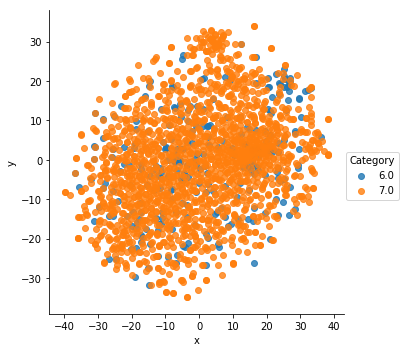

In [19]:
sns.lmplot( x="x", y="y", data=visual, hue="Category",fit_reg=False, legend=True)
plt.show()

In [20]:
visual6=visual[(visual["Category"]==6)]
visual7=visual[(visual["Category"]==7)]

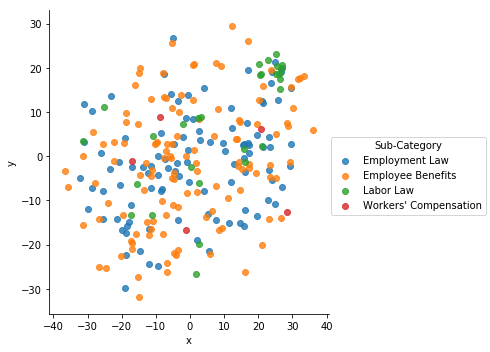

In [21]:

sns.lmplot( x="x", y="y", data=visual6, hue="Sub-Category",fit_reg=False, legend=True)
plt.show()

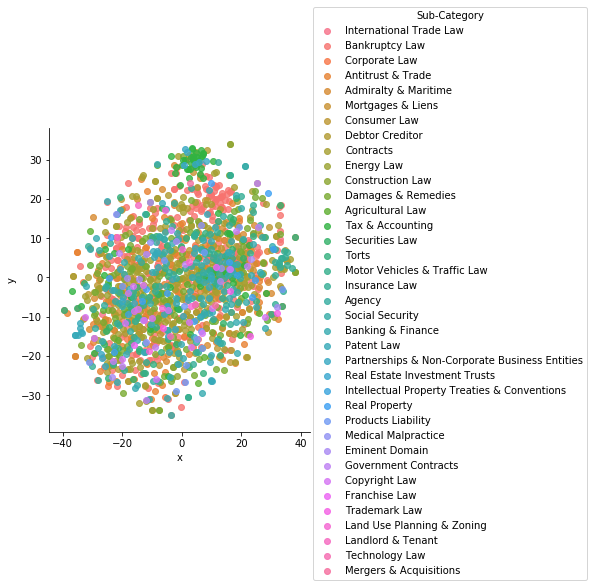

In [22]:
sns.lmplot( x="x", y="y", data=visual7, hue="Sub-Category",fit_reg=False, legend=True)
plt.show()